## 1.Importing liberaries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

### 1.2 Loading the data

In [2]:
dt = pd.read_csv(r"Titanic-Dataset.csv")

## 2. EDA(Exploratory Data Analysis)

In [3]:
dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
dt.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
dt.shape

(891, 12)

In [7]:
len(dt)

891

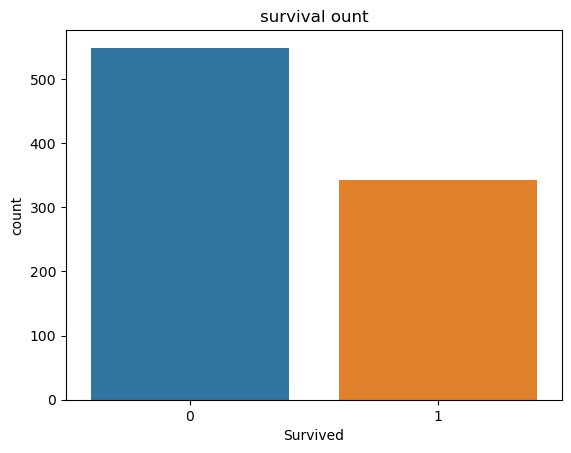

In [8]:
sns.countplot(x='Survived', data=dt)
plt.title('survival count')
plt.show()

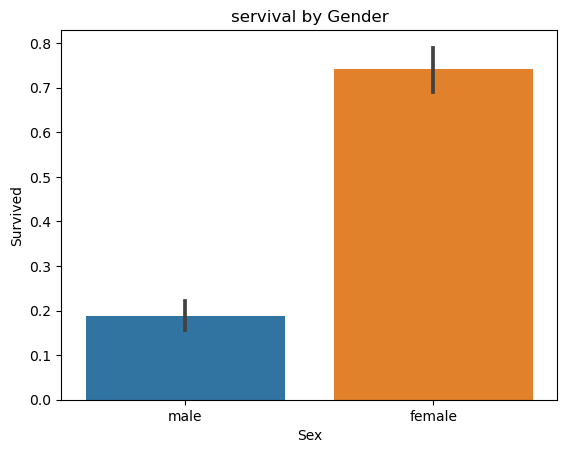

In [9]:
sns.barplot(x='Sex', y='Survived', data=dt)
plt.title('servival by Gender')
plt.show()

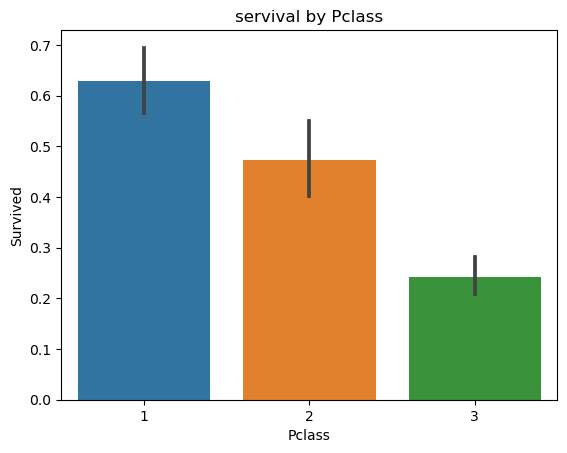

In [10]:
sns.barplot(x='Pclass', y='Survived', data=dt)
plt.title('survival by Pclass')
plt.show()

## 3. Data preprocessing

In [11]:
# check for data types 
print("Data types: \n", dt.dtypes)

Data types: 
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [12]:
# check for missing values
print("Null values: \n", dt.isnull().sum())

Null values: 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [13]:
# handling the missing values 
# filling the missing values in age with median
dt['Age'].fillna(dt['Age'].median(), inplace= True)

# filling the missing values in embarked with mode 
dt['Embarked'].fillna(dt['Embarked'].mode()[0], inplace=True)

#Dropping cabin because there is too many missing values
dt.drop('Cabin', axis=1, inplace=True)

## 4. Feature engineering

In [14]:
# create new feature
dt['Familyno'] = dt['SibSp'] + dt['Parch']
dt['IsAlone'] = (dt['Familyno'] == 1).astype(int)

In [16]:
#Use OneHotEncoder to handle categorical variables
# select the categorical columns
categorical_features = ['Pclass', 'Sex', 'Embarked']

#create onegotencoder pipeline
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                        ('onehot',OneHotEncoder(handle_unknown='ignore'))
                                        ])
# Apply transformations
preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features)
], remainder='passthrough')

In [21]:
# Feature selection 
x = dt[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Familyno']]
y = dt['Survived']

In [26]:
# Splitting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## 5.Train the Model

In [27]:
#Train a Random Forest Classifier using a pipeline
#create model pipeline
RFC = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier',RandomForestClassifier(n_estimators=100, random_state=42))
])

#train the model
RFC.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

## 6. Evaluate the model’s performance using accuracy and classification reports

Accuracy:  0.8379888268156425
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       105
           1       0.81      0.80      0.80        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



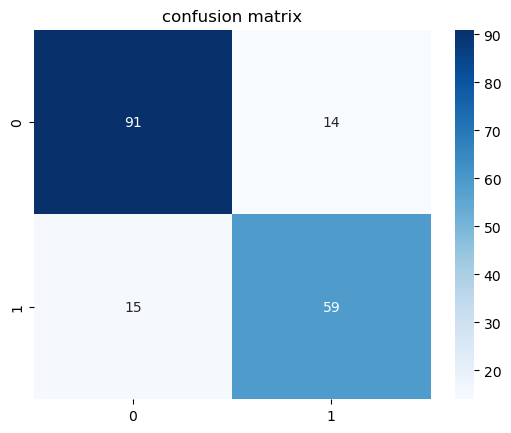

In [29]:
y_pred = RFC.predict(x_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('confusion matrix')
plt.show()

## 7.Hyperparameter Tuning

In [33]:
#Use GridSearchCV to tune hyperparameters and find the best combination
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [4, 6, 8],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RFC, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

print("Best Parameters: ", grid_search.best_params_)

# Evaluate best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(x_test)

print("Tuned Accuracy: ", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

Best Parameters:  {'classifier__max_depth': 6, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Tuned Accuracy:  0.8156424581005587
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.84      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179



## 8.Save the Model

In [34]:
import joblib

# Save the best model
joblib.dump(best_model, 'titanic_survival_model.pkl')

['titanic_survival_model.pkl']